# DENSITY CLUSTERING

* Advanced clustering course
https://www.datanovia.com/en/courses/advanced-clustering/

https://medium.com/@elutins/dbscan-what-is-it-when-to-use-it-how-to-use-it-8bd506293818

DBScan documentation: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

Visualizing DBScan: https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

In [21]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.datasets import make_blobs
# evaluate the models
from sklearn.metrics import silhouette_score, adjusted_rand_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data, _ = make_blobs(1000)

In [18]:
data

array([[-4.95806174,  4.02170078],
       [ 5.43063095, -9.98166486],
       [-1.21680428, -8.85889837],
       ...,
       [-5.35503693,  4.48530838],
       [-2.2405495 ,  4.01314301],
       [-3.16699765,  4.05934378]])

## DBSCAN -- outliers detection
* Density-based Spatial Clustering of Applications with Noise
* Unsupervised method that clusters core sample (dense areas of a dataset) and denotes non-core samples (sparse portions of the dataset)

* https://www.youtube.com/watch?v=dGsxd67IFiU
* https://www.youtube.com/watch?v=C3r7tGRe2eI

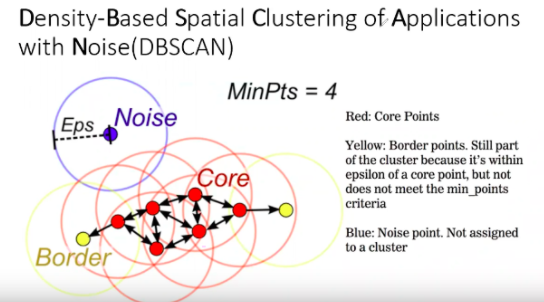

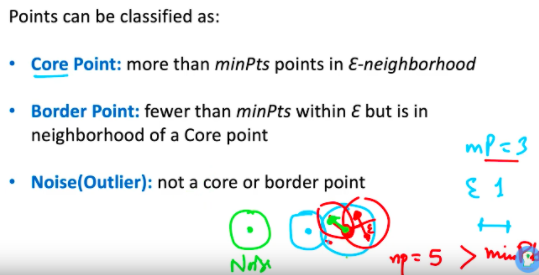

In [19]:
# maximum distance between two samples for them to be clustered
# in the same neighnorhood
# radius of neighborhood
eps = 1

# minimum number of samples in a neighborhood for a data point
# to qualify as a core point (start with very low sample size)
min_samples = 2

# set the model
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# fit the model
dbscan.fit(data)

pd.Series(dbscan.labels_).value_counts()

 1    664
 0    332
-1      2
 2      2
dtype: int64

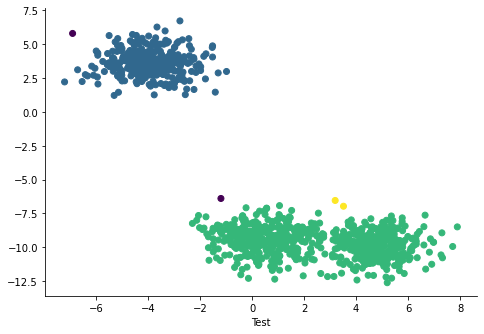

In [20]:
fig = plt.figure()

ax = fig.add_axes([.1, .1, 1, 1])
colors = dbscan.labels_

ax.scatter(data[:,0], 
           data[:,1],
           c=colors, 
#            s=120
          )

ax.set_xlabel('Test')
sns.despine();

Example from clustering to evaluating: https://towardsdatascience.com/dbscan-clustering-for-data-shapes-k-means-cant-handle-well-in-python-6be89af4e6ea

* In order to find out the outliers present in the dataset, you may use DBSCAN clustering algorithm that requires Epsilon and Minimum Points as parameters for threshold values. The better selection of Epsilon and MinPoints values can be obtained using k-dist graph.

* Clustering accuracy can be measured by Silhouette index. To improve index, discard the outliers (if any) present in the data. Sherkat, E., Nourashrafeddin, S., Milios, E. E., & Minghim, R. (2018, March). Interactive Document Clustering Revisited: A Visual Analytics Approach. In 23rd International Conference on Intelligent User Interfaces (pp. 281-292). ACM.

Silhouette Score
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

* https://www.researchgate.net/post/How_to_use_Silhouette_score_to_improve_clustering_accuracy_and_remove_outliers


* DBScan: you can't define the number of clusters

https://stackoverflow.com/questions/18547147/dbscan-setting-limit-on-maximum-cluster-span

https://softwareengineering.stackexchange.com/questions/375406/clustering-algorithm-with-max-number-of-clusters

## Agglomerative Clustering

In [42]:
ward = AgglomerativeClustering(n_clusters=4)
ward.fit(data)
pd.Series(ward.labels_).value_counts()

1    334
0    281
3    227
2    158
dtype: int64

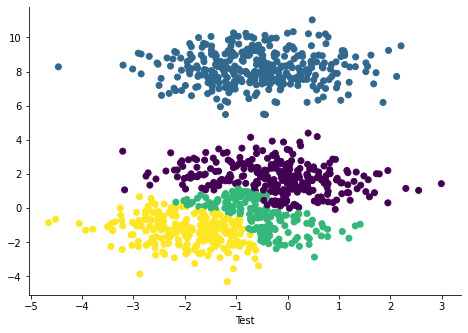

In [43]:
fig = plt.figure()

ax = fig.add_axes([.1, .1, 1, 1])
colors = ward.labels_

ax.scatter(data[:,0], 
           data[:,1],
           c=colors, 
#            s=120
          )

ax.set_xlabel('Test')
sns.despine();

## HDBSCAN
* https://www.youtube.com/watch?v=dGsxd67IFiU
* https://github.com/scikit-learn-contrib/hdbscan

In [5]:
# ! pip install hdbscan

In [44]:
import hdbscan
from sklearn.datasets import make_blobs
clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
cluster_labels = clusterer.fit_predict(data)

In [45]:
clusterer

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=10, min_samples=None, p=None,
        prediction_data=False)

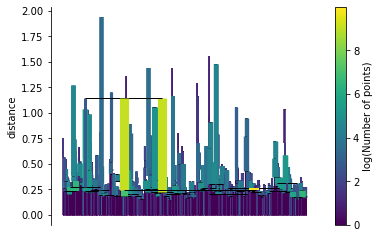

In [48]:
clusterer = hdbscan.RobustSingleLinkage(cut=0.125, k=7)
cluster_labels = clusterer.fit_predict(data)
hierarchy = clusterer.cluster_hierarchy_
alt_labels = hierarchy.get_clusters(0.100, 5)
hierarchy.plot()

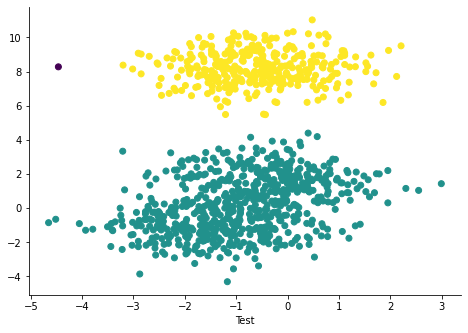

In [46]:
fig = plt.figure()

ax = fig.add_axes([.1, .1, 1, 1])
colors = clusterer.labels_

ax.scatter(data[:,0], 
           data[:,1],
           c=colors, 
#            s=120
          )

ax.set_xlabel('Test')
sns.despine();